<a href="https://colab.research.google.com/github/ash827/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Ashley_Eddings_LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  44561      0 --:--:-- --:--:-- --:--:-- 44561
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [0]:
col_headers = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red',
              'green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters',
              'sunstars','crescent','triangle','icon','animate','text','topleft','botright']

flag_data = pd.read_csv(flag_data_url, header=None, names=col_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data['language'] = flag_data['language'].map({1:'English', 2:'Spanish', 3: 'French', 4: 'German', 5: 'Slavic',
                   6: 'Other Indo-European', 7: 'Chinese', 8: 'Arabic', 
                    9: 'Japanese/Turkish/Finnish/Magyar', 10: 'Others'})
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,Others,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,Other Indo-European,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,Arabic,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,English,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,Other Indo-European,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.language.value_counts()

Others                             46
English                            43
Other Indo-European                30
Spanish                            21
Arabic                             19
French                             17
German                              6
Slavic                              4
Chinese                             4
Japanese/Turkish/Finnish/Magyar     4
Name: language, dtype: int64

##Reading other CSVs

In [0]:
link1 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions.csv'
link2 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_index.csv'
link3 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_header.csv'
df = pd.read_csv(link1, index_col=0)
print(df.shape)
df.head()

(193, 6)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
country,,,,,,
Afghanistan,0,0,0,0.0,Asia,Southern Asia
Albania,89,132,54,4.9,Europe,Southern Europe
Algeria,25,0,14,0.7,Africa,Northern Africa
Andorra,245,138,312,12.4,Europe,Southern Europe
Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df.iloc[0]

beer_servings                               0
spirit_servings                             0
wine_servings                               0
total_litres_of_pure_alcohol                0
region                                   Asia
sub-region                      Southern Asia
Name: Afghanistan, dtype: object

In [0]:
df.loc['Afghanistan']

beer_servings                               0
spirit_servings                             0
wine_servings                               0
total_litres_of_pure_alcohol                0
region                                   Asia
sub-region                      Southern Asia
Name: Afghanistan, dtype: object

In [0]:
df.loc['USA']

beer_servings                   249
spirit_servings                 158
wine_servings                    84
total_litres_of_pure_alcohol    8.7
region                          NaN
sub-region                      NaN
Name: USA, dtype: object

In [0]:
#df.to_csv('name of the file') - this saves it! 

In [0]:
df.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'region', 'sub-region'],
      dtype='object')

In [0]:
df = pd.read_csv(link2, index_col=0)
#df = pd.read_csv(link2, usecols=range(1,8)) #this specifies the columns you want to use
#df = df.drop(['name of columns to drop'], axis=1)
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df = pd.read_csv(link3, header=3) #Be sure to check help for definitions
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


## Loading from a local CSV to Google Colab

In [0]:
#Go to files on the left here and upload
#or
from google.colab import files
uploaded - files_upload() #pulls up to upload a file


In [0]:
#df = pd.read_csv('drinks_with_regions_header.csv', skiprows=3)
#df.head() this is the code to pull up info

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

In [0]:
import matplotlib.pyplot as plt   # side note, check out Panel Anaconda Cloud

# Scatter Plot
plt.scatter(x, y)
plt.xlabel('name from csv data')
plt.ylabel('name from csv data')
plt.show()

In [0]:
# Histogram
plt.hist(df.'name', bins =20)

In [0]:
# Seaborn Density Plot

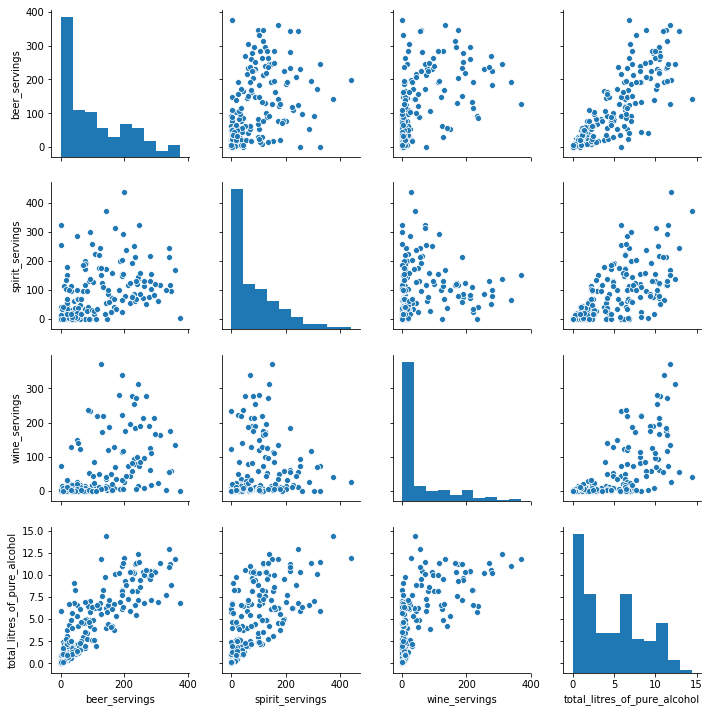

In [0]:
# Seaborn Pairplot
import seaborn as sns
sns.pairplot(df)

## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?
df.nameofdata.hist(bins=20)

In [0]:
# Pandas Scatterplot
df.plot.scatter('name', 'other name');

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

In [0]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
region                          26
sub-region                      26
dtype: int64

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')# '?'
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df.workclass.value_counts() # You can replace workclass with the word Private 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
df.occupation.value_counts() # Too much variety here

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
#df.country.value_counts()  # check out the ?
#df.country.unique() #they all have spaces before the word

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
#df = df.dropna() #df.dropna() returns the whole dataframe without nan values
#df.shape

(30162, 15)

In [0]:
#df.dropna(subset =['country'],inplace=True)
#df.shape

(31978, 15)

In [0]:
df.mode().iloc[0]

age                                36
workclass                     Private
fnlwgt                         123011
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation             Prof-specialty
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
country                 United-States
salary                          <=50K
Name: 0, dtype: object

## Fill Missing Values

In [0]:
df = df.fillna(df.mode().iloc[0])
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [31]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed


# I am going to use the !curl method, as I am not as familiar with it, and would love to learn
# how to properly use everything
wine_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
!curl 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045
1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510
1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280
1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320
1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150
1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547
1,13.63,1.81,2.7,17.2,112,2.85,2.91,.3,1.46,7.3,1.28,2.88,131

## I chose to work with data about wine! It's a chemical analysis of wines grown in Italy, from three dfifferent cultivars! Two of my favorite things :) 

In [48]:
import pandas as pd
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, index_col=0)
wine_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
wine_data.shape

(178, 13)

In [50]:
wine_data.count() # I needed to use header=None to match my number of instances from the website

1     178
2     178
3     178
4     178
5     178
6     178
7     178
8     178
9     178
10    178
11    178
12    178
13    178
dtype: int64

In [51]:
wine_data.isna().sum()   # Phew! Clean dataset chosen :) 

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

## We definitely need the attribrutes from the website to know what 1-13 means. We can name the columns this way.

1) Alcohol 
2) Malic acid 
3) Ash 
4) Alcalinity of ash 
5) Magnesium 
6) Total phenols 
7) Flavanoids 
8) Nonflavanoid phenols 
9) Proanthocyanins 
10)Color intensity 
11)Hue 
12)OD280/OD315 of diluted wines 
13)Proline 


In [52]:
col_headers = ['Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium',
              'Total Phenols','Flavanoids','Nonflavanoid Phenols','Proanthocyanins',
              'Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']

wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, names=col_headers)
wine_data.head()  # Hey I did it! 

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Now it's time for the graphs! Let's see how much I've learned :) 

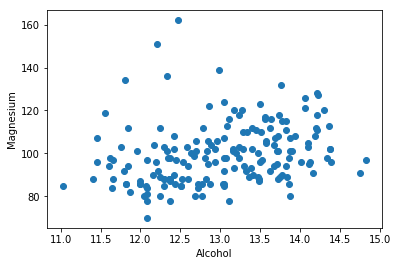

In [74]:
import matplotlib.pyplot as plt
plt.scatter(wine_data['Alcohol'], wine_data['Magnesium'])
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')  # Hey! I showed a comparison of Alcohol and Magnesium content in Wine! 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b88d2358>,
      dtype=object)

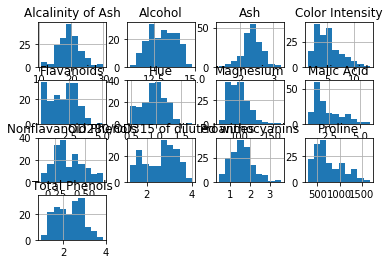

In [57]:
wine_data.hist()  

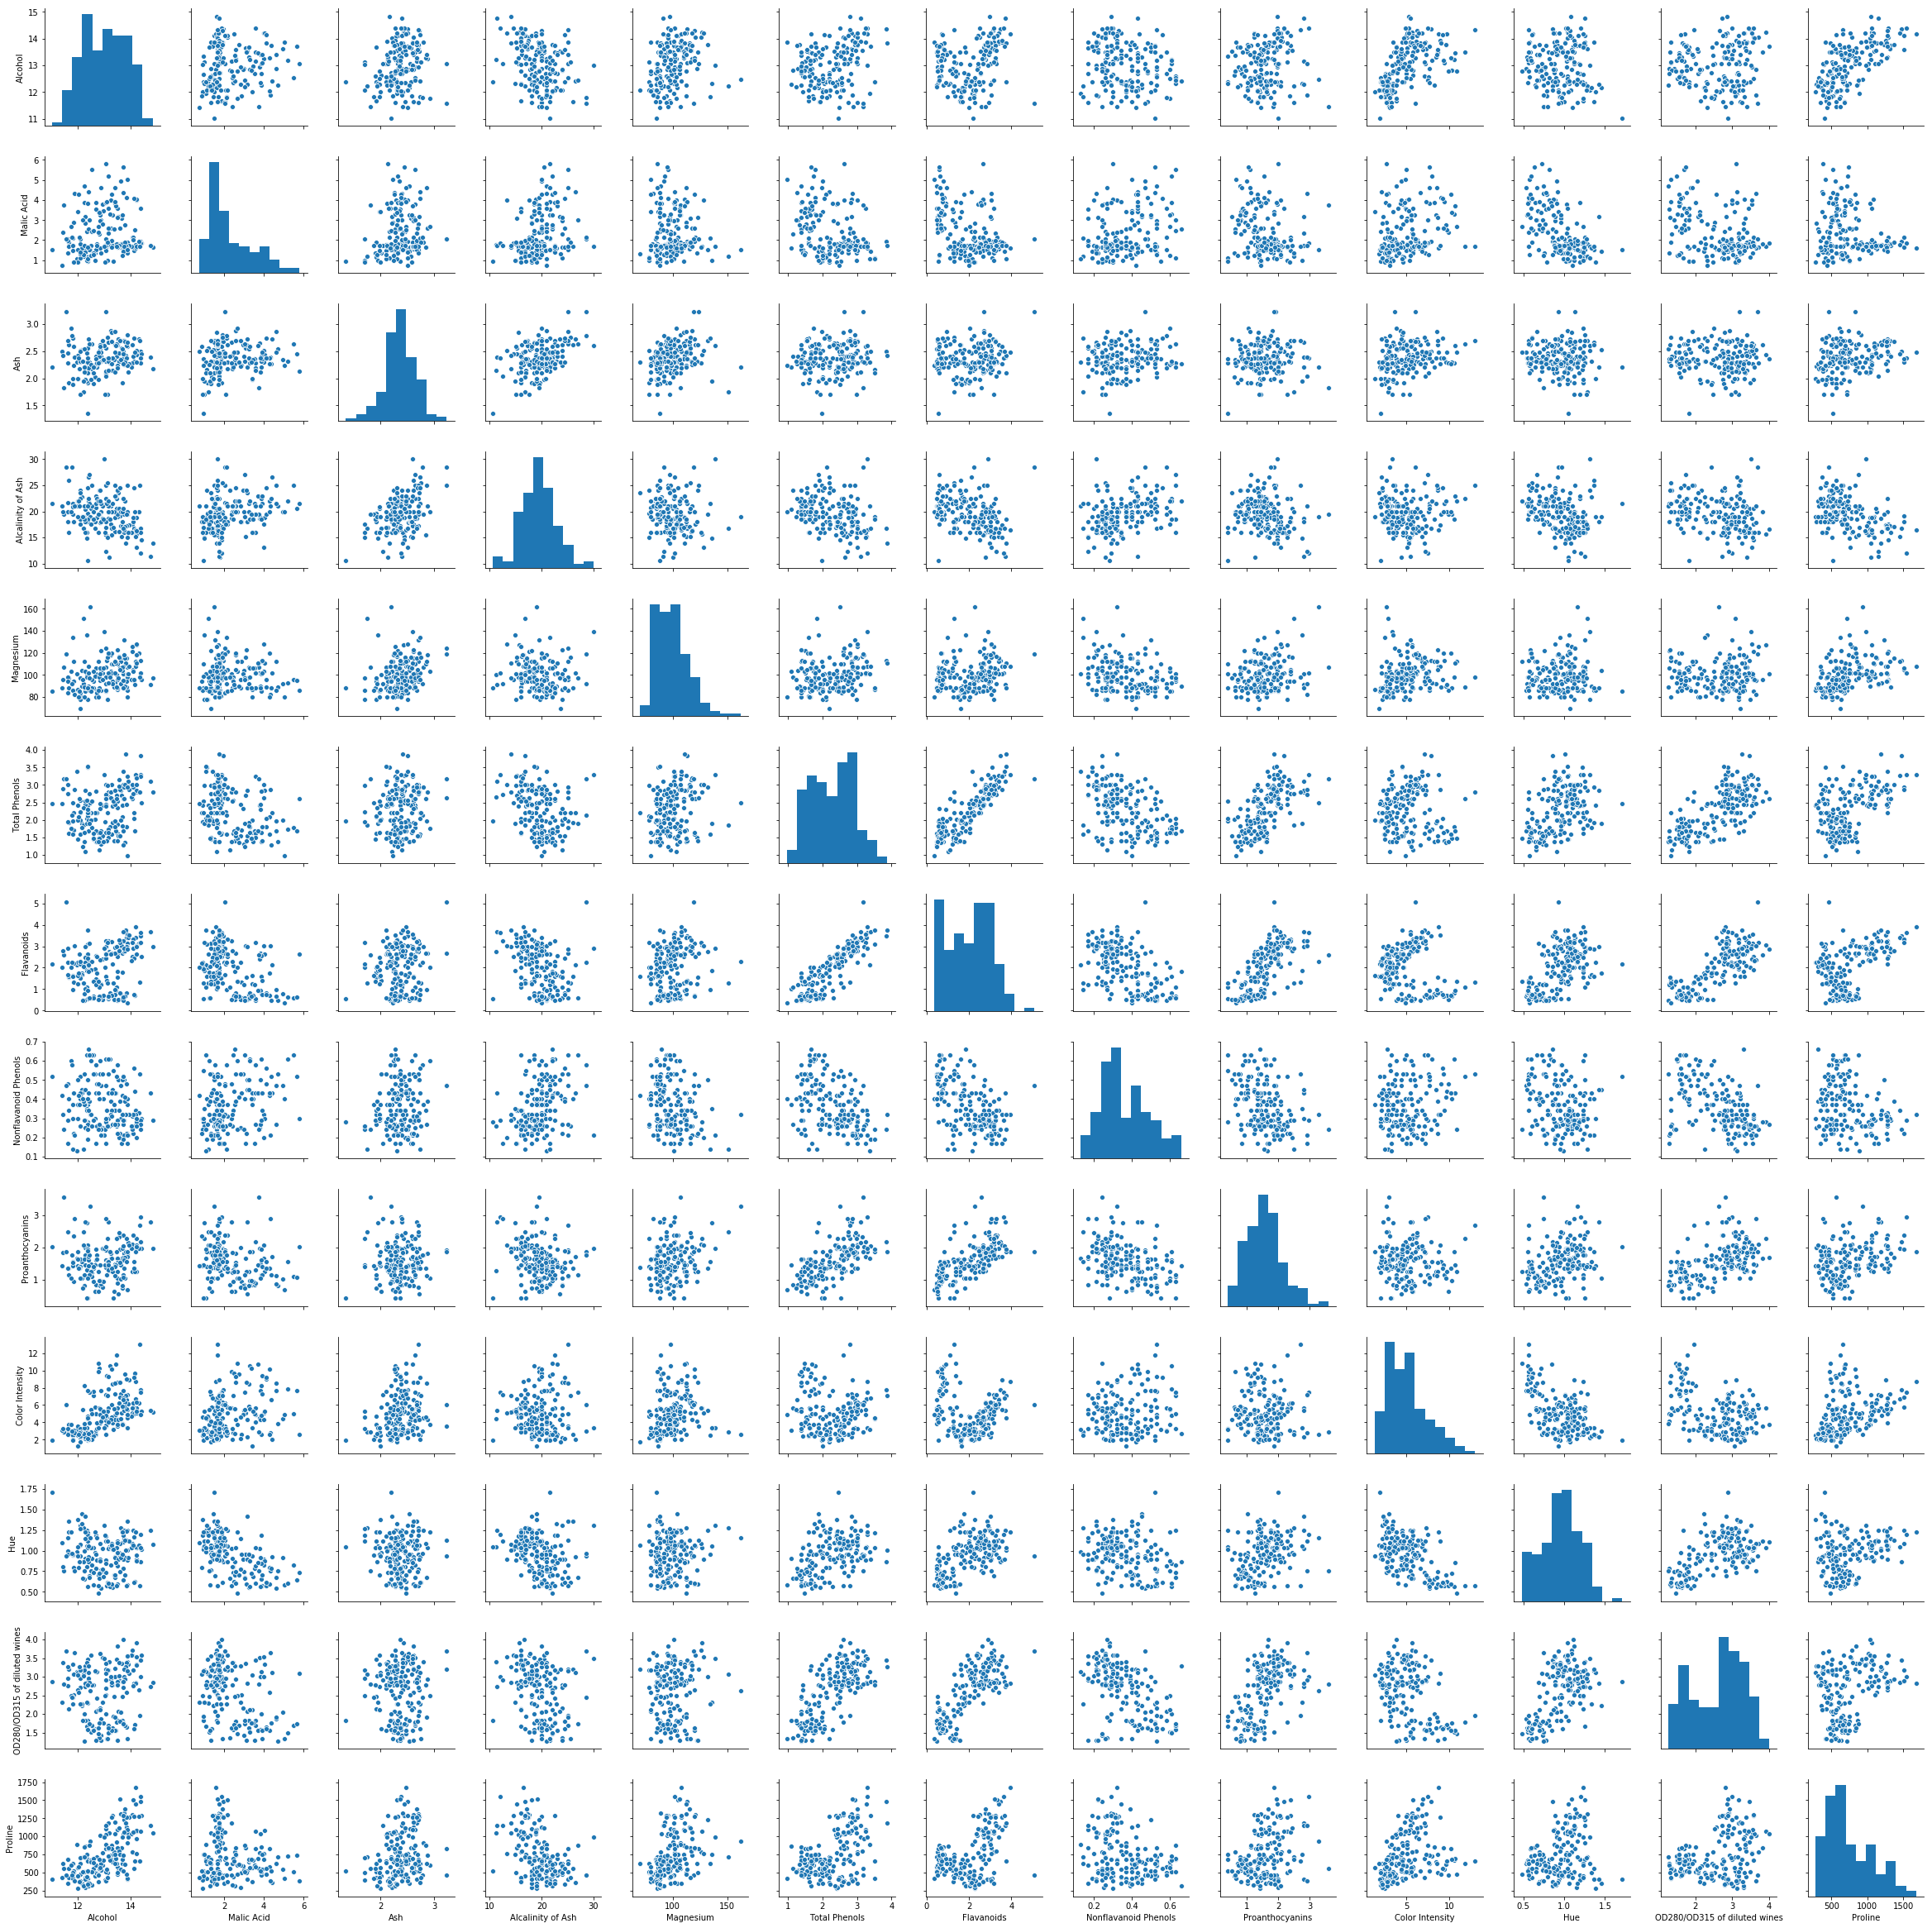

In [62]:
import seaborn as sns   # This one is my favorite! 
sns.pairplot(wine_data)

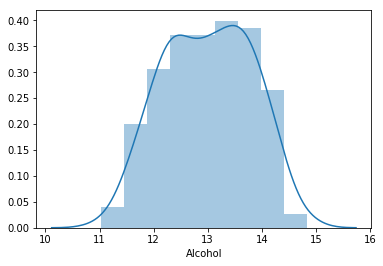

In [68]:
#I've never created a Density Plot before so hopefully some GOOGLEFOO and hope will get me there!
sns.distplot(wine_data['Alcohol'], hist=True, kde=True); #KDE=Kernel Density Estimation
#I did it! I think I'm starting to get the hang of using my research online and understanding 
#the materials posted to find a result. It used to not make much sense when I searched alone. Progress!


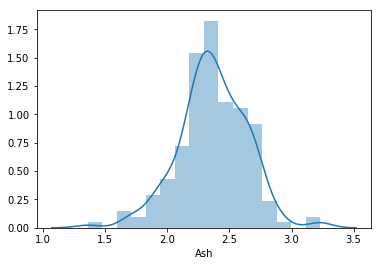

In [70]:
sns.distplot(wine_data['Ash'], hist=True, kde=True);

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

##I had to choose Anime for my stretch goal. I love Anime, and I am sure using datasets with information I am interested in will help me learn how to create them. This pulls information specifically from Studio Ghibli Films, and more specifically My Neighbor Totoro. Here we go! 

In [76]:
anime_data_url = 'https://ghibliapi.herokuapp.com/films/58611129-2dbc-4a81-a72f-77ddfc1b1b49'
!curl https://ghibliapi.herokuapp.com/films/58611129-2dbc-4a81-a72f-77ddfc1b1b49

{
  "id": "58611129-2dbc-4a81-a72f-77ddfc1b1b49",
  "title": "My Neighbor Totoro",
  "description": "Two sisters move to the country with their father in order to be closer to their hospitalized mother, and discover the surrounding trees are inhabited by Totoros, magical spirits of the forest. When the youngest runs away from home, the older sister seeks help from the spirits to find her.",
  "director": "Hayao Miyazaki",
  "producer": "Hayao Miyazaki",
  "release_date": "1988",
  "rt_score": "93",
  "people": [
    "https://ghibliapi.herokuapp.com/people/986faac6-67e3-4fb8-a9ee-bad077c2e7fe",
    "https://ghibliapi.herokuapp.com/people/d5df3c04-f355-4038-833c-83bd3502b6b9",
    "https://ghibliapi.herokuapp.com/people/3031caa8-eb1a-41c6-ab93-dd091b541e11",
    "https://ghibliapi.herokuapp.com/people/87b68b97-3774-495b-bf80-495a5f3e672d",
    "https://ghibliapi.herokuapp.com/people/d39deecb-2bd0-4770-8b45-485f26e1381f",
    "https://ghibliapi.herokuapp.com/people/591524bc-04fe-4e60-8d61

In [81]:
!pip install requests
import requests

In [98]:
request = requests.get('https://ghibliapi.herokuapp.com/films/58611129-2dbc-4a81-a72f-77ddfc1b1b49')
print(request.text)  # Okay, so this pulls up the same thing as the curl method

{
  "id": "58611129-2dbc-4a81-a72f-77ddfc1b1b49",
  "title": "My Neighbor Totoro",
  "description": "Two sisters move to the country with their father in order to be closer to their hospitalized mother, and discover the surrounding trees are inhabited by Totoros, magical spirits of the forest. When the youngest runs away from home, the older sister seeks help from the spirits to find her.",
  "director": "Hayao Miyazaki",
  "producer": "Hayao Miyazaki",
  "release_date": "1988",
  "rt_score": "93",
  "people": [
    "https://ghibliapi.herokuapp.com/people/986faac6-67e3-4fb8-a9ee-bad077c2e7fe",
    "https://ghibliapi.herokuapp.com/people/d5df3c04-f355-4038-833c-83bd3502b6b9",
    "https://ghibliapi.herokuapp.com/people/3031caa8-eb1a-41c6-ab93-dd091b541e11",
    "https://ghibliapi.herokuapp.com/people/87b68b97-3774-495b-bf80-495a5f3e672d",
    "https://ghibliapi.herokuapp.com/people/d39deecb-2bd0-4770-8b45-485f26e1381f",
    "https://ghibliapi.herokuapp.com/people/591524bc-04fe-4e60-8d61

In [83]:
print(request.status_code) # This means that everything is ok! I am following along with the Medium article posted.

200


In [99]:
people = requests.get('https://ghibliapi.herokuapp.com/films/58611129-2dbc-4a81-a72f-77ddfc1b1b49.json')
print(people.text)  # Not sure where I'm going wrong here. But this is definitely more complicated

{
  "length": null
}


In [96]:
# Let's see what the json endpoint brings up 
#species = requests.get('https://ghibliapi.herokuapp.com/species?name=spirit.json')
#print(species.text)
people_json  = people.json()
print(people_json)

{'id': '986faac6-67e3-4fb8-a9ee-bad077c2e7fe', 'name': 'Satsuki Kusakabe', 'gender': 'Female', 'age': '11', 'eye_color': 'Dark Brown/Black', 'hair_color': 'Dark Brown', 'films': ['https://ghibliapi.herokuapp.com/films/58611129-2dbc-4a81-a72f-77ddfc1b1b49'], 'species': 'https://ghibliapi.herokuapp.com/species/af3910a6-429f-4c74-9ad5-dfe1c4aa04f2', 'url': 'https://ghibliapi.herokuapp.com/people/986faac6-67e3-4fb8-a9ee-bad077c2e7fe', 'length': None}


In [97]:
locations_json = locations.json()
print(locations_json)

NameError: ignored